<a href="https://colab.research.google.com/github/rajshekharsingh66/Capstone_project1/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on dataset Global Terrorism

##Project Type - EDA
Contribution - Individual

by - Raj shekhar singh
email - rajshekharsingh26993@gmail.com

#Project Summary

Our project delves into the intricate realm of global terrorism, aiming to extract meaningful insights from a comprehensive dataset. This dataset serves as a crucial repository of information, shedding light on the multifaceted nature of terrorist activities worldwide. To embark on this analytical journey, we first navigate through the basics: understanding what this dataset encapsulates and the tools required for our analysis.

1. What this dataset is all about?
The dataset encompasses a wide array of information, detailing terrorist incidents globally. It spans several years and provides data on the motives, methods, and impact of these activities, offering a nuanced understanding of the global terrorism landscape.

2. Installation of Libraries and Dataset
Our analysis hinges on the power of Python's data analysis stack, employing libraries such as Pandas for data manipulation, NumPy for numerical operations, and Matplotlib and Seaborn for visualizations. Additionally, we utilize the 'os' library for efficient file handling. Importantly, we load and preprocess the dataset to make it amenable to our analytical techniques.

3. Basic Analysis
We kick off our exploration with basic statistical analyses, gaining insights into the dataset's structure and dimensions. Descriptive statistics provide an initial understanding of the data's central tendencies and variations.

4. Motive Behind Activities Related to Terrorism
One of the pivotal questions we tackle involves understanding the motives driving terrorist activities. By employing sophisticated analytical methods, we unravel patterns and discern underlying motives, bringing context to seemingly disparate incidents.

5. Number of Terrorist Activities Occurred in Region with Respect to Year
A temporal analysis helps us dissect the dataset across years and regions, discerning trends and fluctuations. This analysis provides a nuanced perspective on the evolving nature of terrorism worldwide.

6. Number of Terrorist Activities vs Year
Visual representations, crafted using Matplotlib and Seaborn, elucidate the relationship between the number of terrorist activities and the passage of time. These visualizations offer compelling insights into the dataset's temporal patterns.

7. Who Are the Main Targets?
By dissecting the data, we identify primary targets of terrorist activities. This information is vital for understanding the societal, political, and economic impacts of such incidents.

8. Hot Zones of Terrorism by Country and City
Geospatial analyses pinpoint terrorism hotspots, unveiling regions and cities most affected by these activities. Visual representations overlaying maps provide a striking portrayal of these hot zones.

9. What Are the Attacking Methods Used?
Our exploration extends to the methods employed in these attacks. By categorizing and visualizing these methods, we discern patterns that offer insights into the strategies of different terrorist groups.

10. Attacks vs Killed
A critical analysis revolves around understanding the correlation between the number of attacks and the fatalities they cause. This analysis underscores the devastating impact of terrorism on human lives.

11. Most Notorious Groups
Delving deep into the dataset, we identify and analyze the most notorious terrorist groups. Understanding these groups is pivotal for global security efforts.

12. Conclusion
In conclusion, our exploratory data analysis paints a comprehensive picture of global terrorism. Through the lens of data, we uncover patterns, motives, and impacts, offering invaluable insights for policymakers, security experts, and researchers. By utilizing Python's powerful libraries, our analysis becomes not just a study in data, but a tool for informed decision-making in the realm of global security.

This project showcases the profound impact of data analysis in deciphering complex phenomena, empowering us with knowledge that transcends borders and ideologies.

#Github link

- https://github.com/rajshekharsingh66/Capstone_project1


# **Problem Statement**

## Business Objective
Terrorism involves the use of violence to instill fear within a population, but it's crucial to recognize that not all acts of violence qualify as terrorism.

In my role as a security and defense analyst, I identify regions with a high incidence of terrorism and extract valuable security-related information and insights through Exploratory Data Analysis (EDA).

# ***Let's Begin !***


## 1. What this data set is all about?

1.Contains data regarding over 180,000 acts of terrorism.

2.Encompasses details about global terrorist incidents spanning the years 1970 through 2017.

3.Provides comprehensive data on both domestic and international acts of terrorism that occurred within a specified timeframe.





## 2. Installation of libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_file_path = '/content/Global Terrorism Data.csv'

encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(csv_file_path, encoding=encoding)
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        continue  # If decoding fails, try the next encoding


FileNotFoundError: ignored

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
133354,201406130001,2014,6,12,NaN,1,NaN,155,West Bank and Gaza Strip,10,...,"Other groups, including Al-Aqsa Martyrs Brigad...","""Israel Gaza raid kills Palestinian militant o...","""Israeli authorities name suspects in teens' k...","""Mom speaks out on three abducted teens,"" CNN,...",START Primary Collection,0.0,0.0,0.0,0.0,NaN
133355,201406130004,2014,6,13,NaN,0,NaN,113,Libya,10,...,NaN,"""SOCAFRICA: Libya Incident Tracker: 08  14 Ju...",NaN,NaN,START Primary Collection,0.0,0.0,0.0,0.0,NaN
133356,201406130012,2014,6,13,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Highlights: Pakistan Balochistan Press 14 Jun...",NaN,NaN,START Primary Collection,0.0,0.0,0.0,0.0,NaN
133357,201406130014,2014,6,13,NaN,0,NaN,153,Pakistan,6,...,NaN,"""PML-N leader among three shot dead in Balochi...","""PML-N leader shot dead in Balochistan,"" DAWN ...","""PML-N leader shot dead in Khuzdar,"" The E...",START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
133358,201406130016,2014,6,13,NaN,0,NaN,182,Somalia,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.333590e+05,133359.000000,133359.000000,133359.000000,133359.000000,133359.000000,133359.000000,129078.000000,1.290770e+05,133353.000000,...,1.085000e+03,2.990000e+02,5.100000e+02,288.000000,6474.000000,5882.000000,133358.000000,133358.000000,133358.000000,133358.000000
mean,1.998025e+11,1997.960355,6.341072,15.378595,0.036338,134.569710,6.726138,22.509242,-6.482157e+02,1.436796,...,3.332532e+06,1.089224e+06,5.351309e+05,426.003472,4.466172,-23.733254,-4.643134,-4.593478,0.100856,-3.983338
std,1.252282e+09,12.524202,3.394693,8.822744,0.187130,117.295785,3.010577,20.035822,2.398899e+05,1.027414,...,3.247390e+07,9.691238e+06,2.859938e+06,4023.185283,2.060760,59.772994,4.543728,4.608998,0.647574,4.687631
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.988020e+11,1988.000000,3.000000,8.000000,0.000000,69.000000,5.000000,8.964041,-6.341388e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.997092e+11,1997.000000,6.000000,15.000000,0.000000,98.000000,6.000000,30.661385,3.550351e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.011013e+11,2011.000000,9.000000,23.000000,0.000000,160.000000,10.000000,35.120144,6.821800e+01,1.000000,...,5.000000e+05,0.000000e+00,2.475000e+04,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,2.014061e+11,2014.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

NameError: ignored

In [ ]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 133359
Number of columns: 135


In [ ]:
df.index

RangeIndex(start=0, stop=133359, step=1)

In [ ]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    131517
               ...  
INT_LOG            1
INT_IDEO           1
INT_MISC           1
INT_ANY            1
related       116956
Length: 135, dtype: int64

In [ ]:
df.nunique()

eventid       133359
iyear             44
imonth            13
iday              32
approxdate       824
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        11442
Length: 135, dtype: int64

## 3. Data preperation and Cleaning

In [ ]:
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# concatinating the columns killed and wounded
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
df.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


# 4. Basic Analysis by using visulisation




##1.Which region has highest terrorirst attacks?




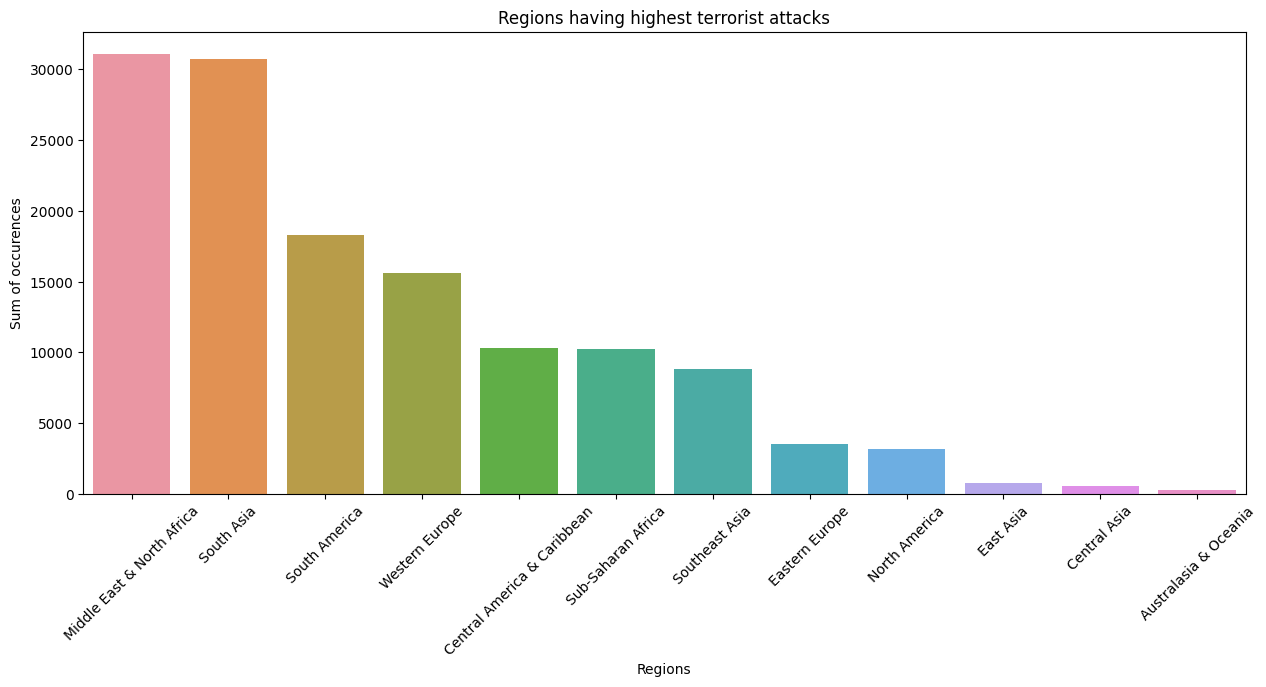

In [ ]:


# Set the figure size (width, height) in inches
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

# Assuming 'df' is your DataFrame with a 'Region' column
sns.countplot(x='Region', data=df,order=df['Region'].value_counts().index)

# Add labels and a title
plt.xlabel('Regions')
plt.ylabel('Sum of occurences')
plt.title('Regions having highest terrorist attacks')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

##2.Which country has highest terrorirst attacks?

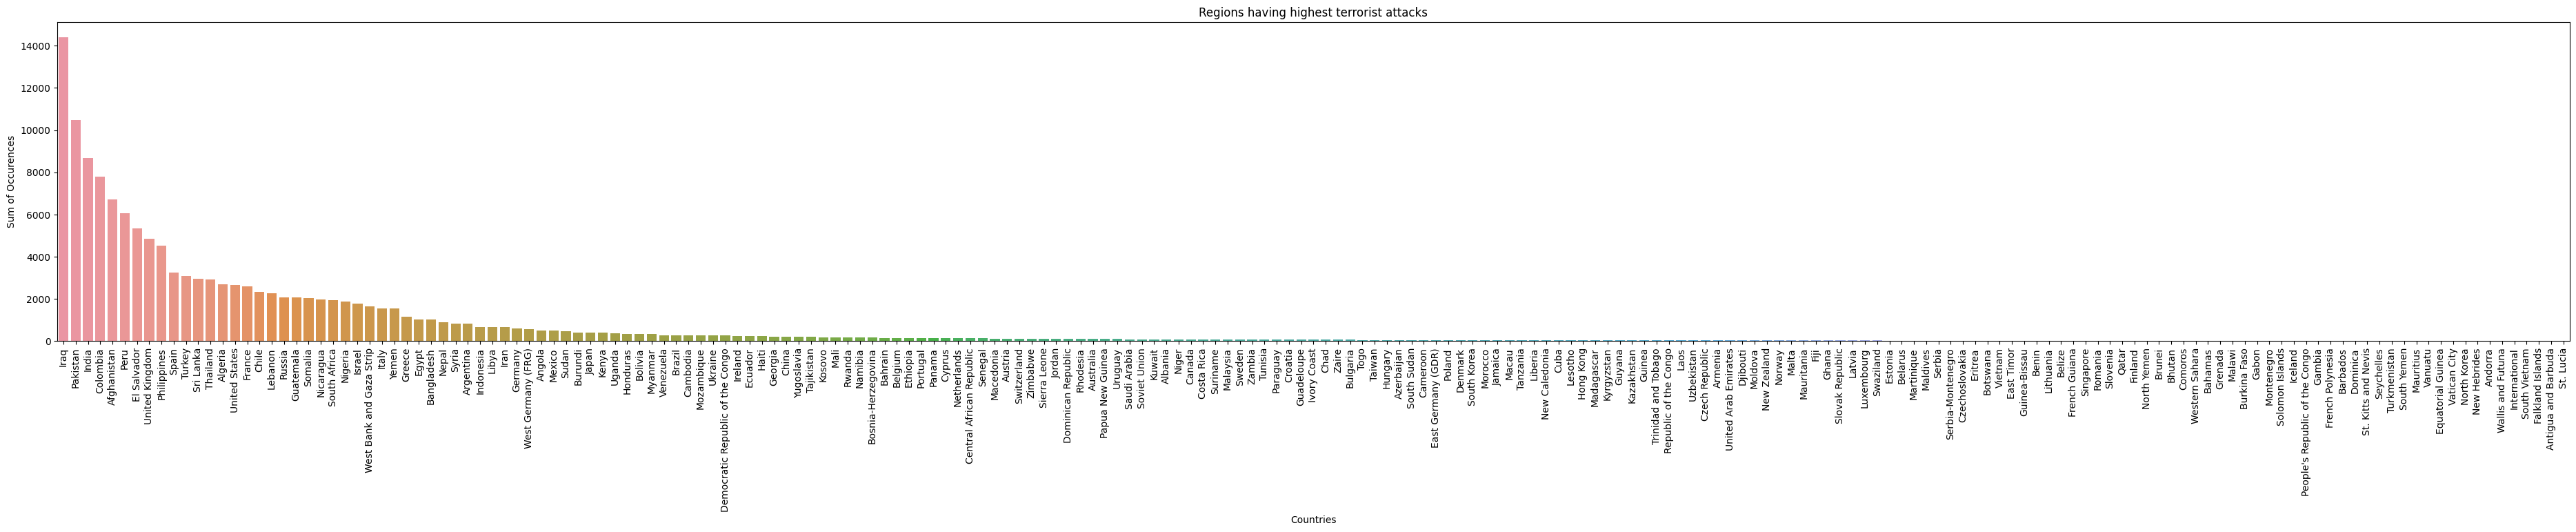

In [ ]:
plt.figure(figsize=(47,6))
sns.countplot(x='Country', data=df , order=df['Country'].value_counts().index)

# Add labels and a title
plt.xlabel('Countries')
plt.ylabel('Sum of Occurences')
plt.title('Regions having highest terrorist attacks')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

## 3.Which is the most weapon used by terrorirsts ?

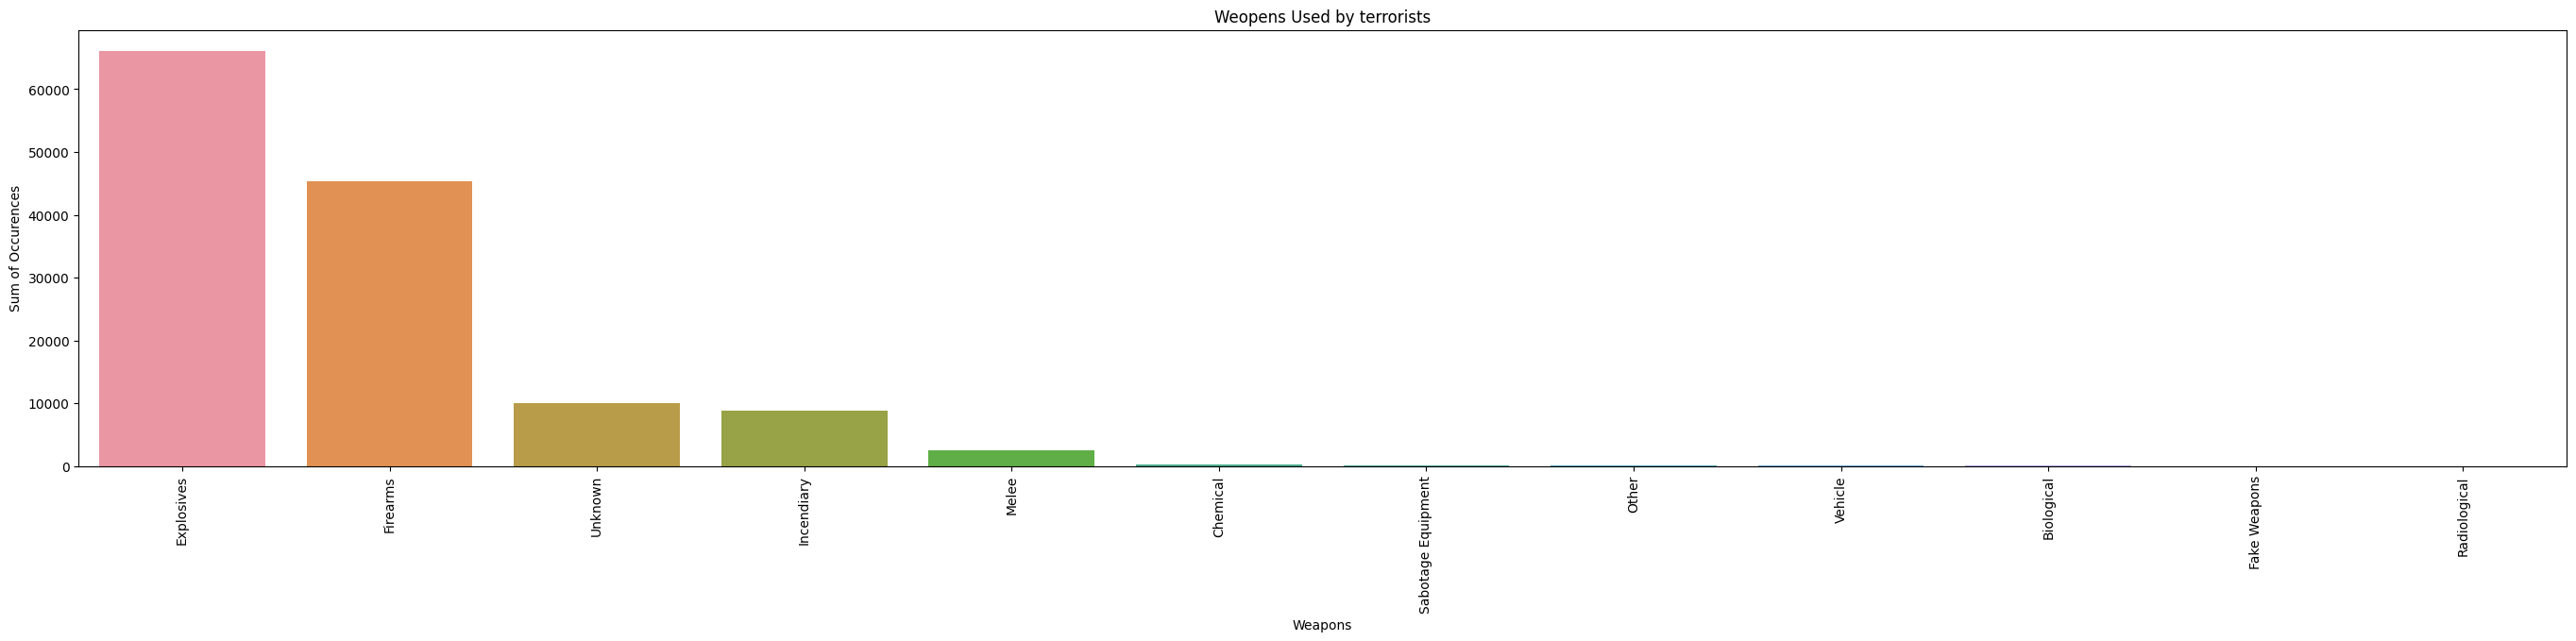

In [ ]:
plt.figure(figsize=(34,6))
df['Weapon_type'] = df['Weapon_type'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
sns.countplot(x='Weapon_type',data=df,order=df['Weapon_type'].value_counts().index)
plt.xlabel('Weapons')
plt.ylabel('Sum of Occurences')
plt.title('Weopens Used by terrorists')
plt.xticks(rotation=90)
plt.show()

#4. Motive behind activities related to terrorism

In [ ]:
df1 = df[df['Motive'].notna()]

In [ ]:
df1['Motive']

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualty
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0
11,1970,1,6,United States,North America,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,0.0
14,1970,1,9,United States,North America,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133296,2014,6,11,Pakistan,South Asia,Karachi,24.891115,67.143311,Armed Assault,2.0,0.0,Officers,06/11/2014: Assailants opened fire on a police...,Unknown,Police,Firearms,"The specific motive is unknown; however, sourc...",2.0
133327,2014,6,12,Somalia,Sub-Saharan Africa,Buale district,1.231271,42.708321,Hostage Taking (Kidnapping),0.0,0.0,Women,06/12/2014: Assailants abducted 60 women in Bu...,Al-Shabaab,Private Citizens & Property,Unknown,"The specific motive is unknown; however, sourc...",0.0
133347,2014,6,12,Lebanon,Middle East & North Africa,Arsal,34.184605,36.424011,Hostage Taking (Kidnapping),1.0,1.0,Refugee Camp,06/12/2014: Assailants opened fire on a Syrian...,Al-Nusrah Front,Private Citizens & Property,Firearms,"The specific motive is unknown; however, sourc...",2.0
133353,2014,6,12,India,South Asia,Pottangi,18.564658,82.963632,Assassination,2.0,0.0,Suspected Informants,06/12/2014: Assailants abducted the brother of...,Maoists,Private Citizens & Property,Unknown,"The specific motive is unknown; however, sourc...",2.0


#5. Number of terrorist activities occured in region with respect to year

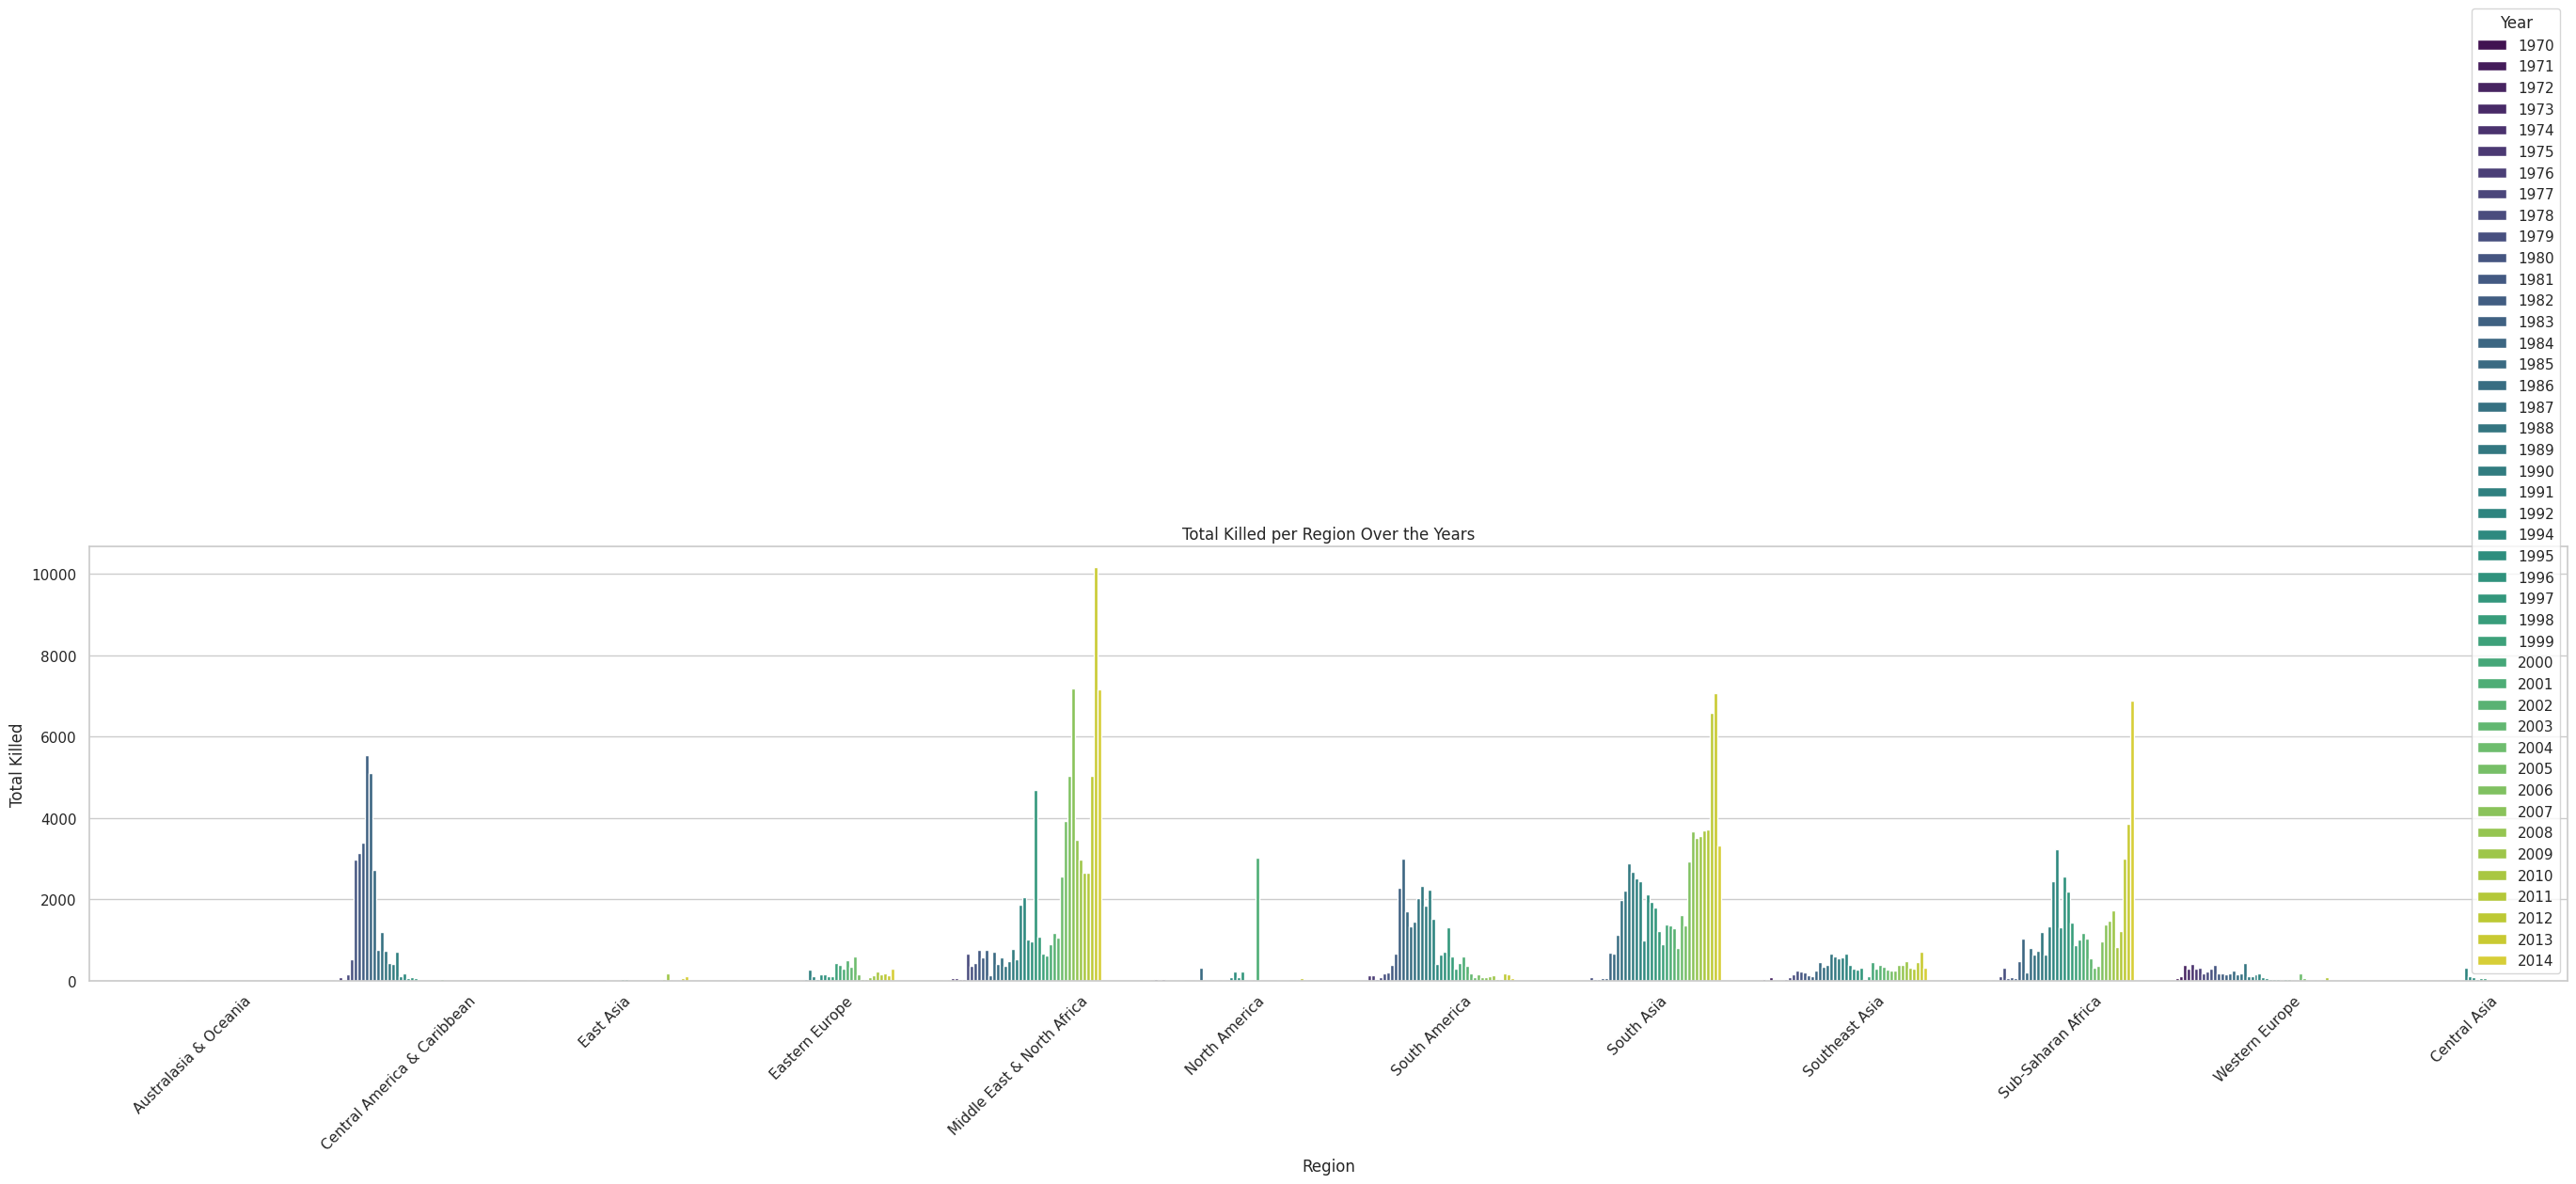

In [ ]:
df_grouped = df.groupby(['Year', 'Region'])['Killed'].sum().reset_index()

# Set the style of the plot
sns.set(style="whitegrid")
plt.figure(figsize=(34, 6))

# Create the animated bar plot
sns.barplot(x="Region", y="Killed", hue="Year", data=df_grouped, palette="viridis")

# Customize the plot
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Total Killed")
plt.title("Total Killed per Region Over the Years")

# Show the legend
plt.legend(title="Year")

# Show the plot
plt.tight_layout()
plt.show() # use a bin of 1000 or 500 .

## 6. Number of Terrorist activities vs Year

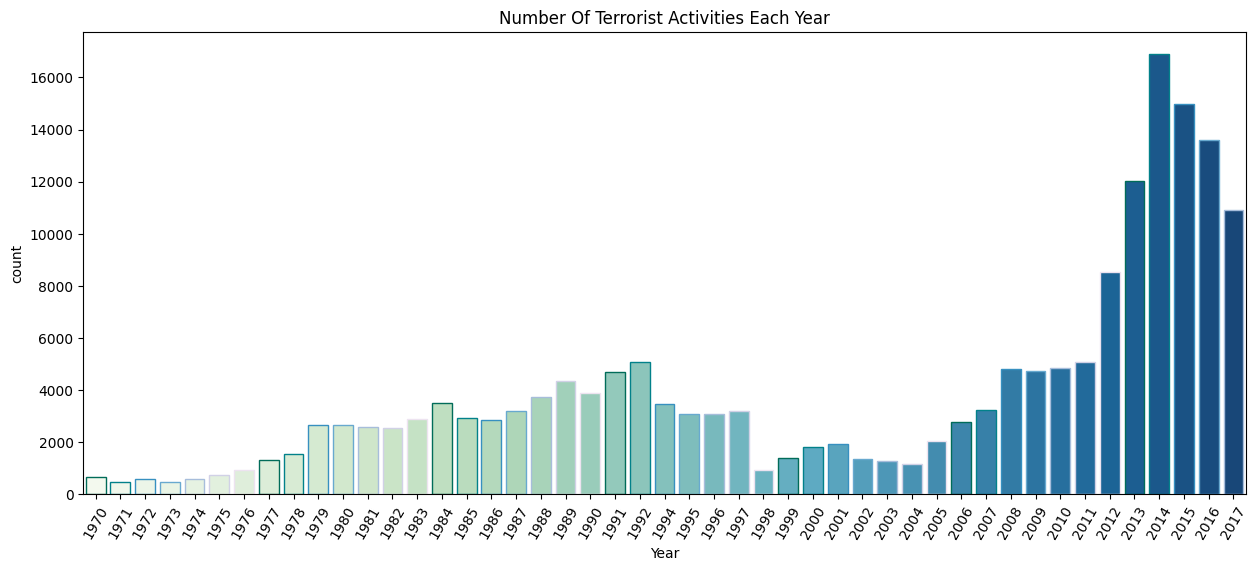

In [ ]:
# Assuming 'df' is your DataFrame with a 'Year' column
plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='GnBu', edgecolor=sns.color_palette('PuBuGn_r', 7))
plt.xticks(rotation=60)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()  #line plot or point plot


In [ ]:
df['Killed'].sum()

248509.0

## 7. Who are the main targets?


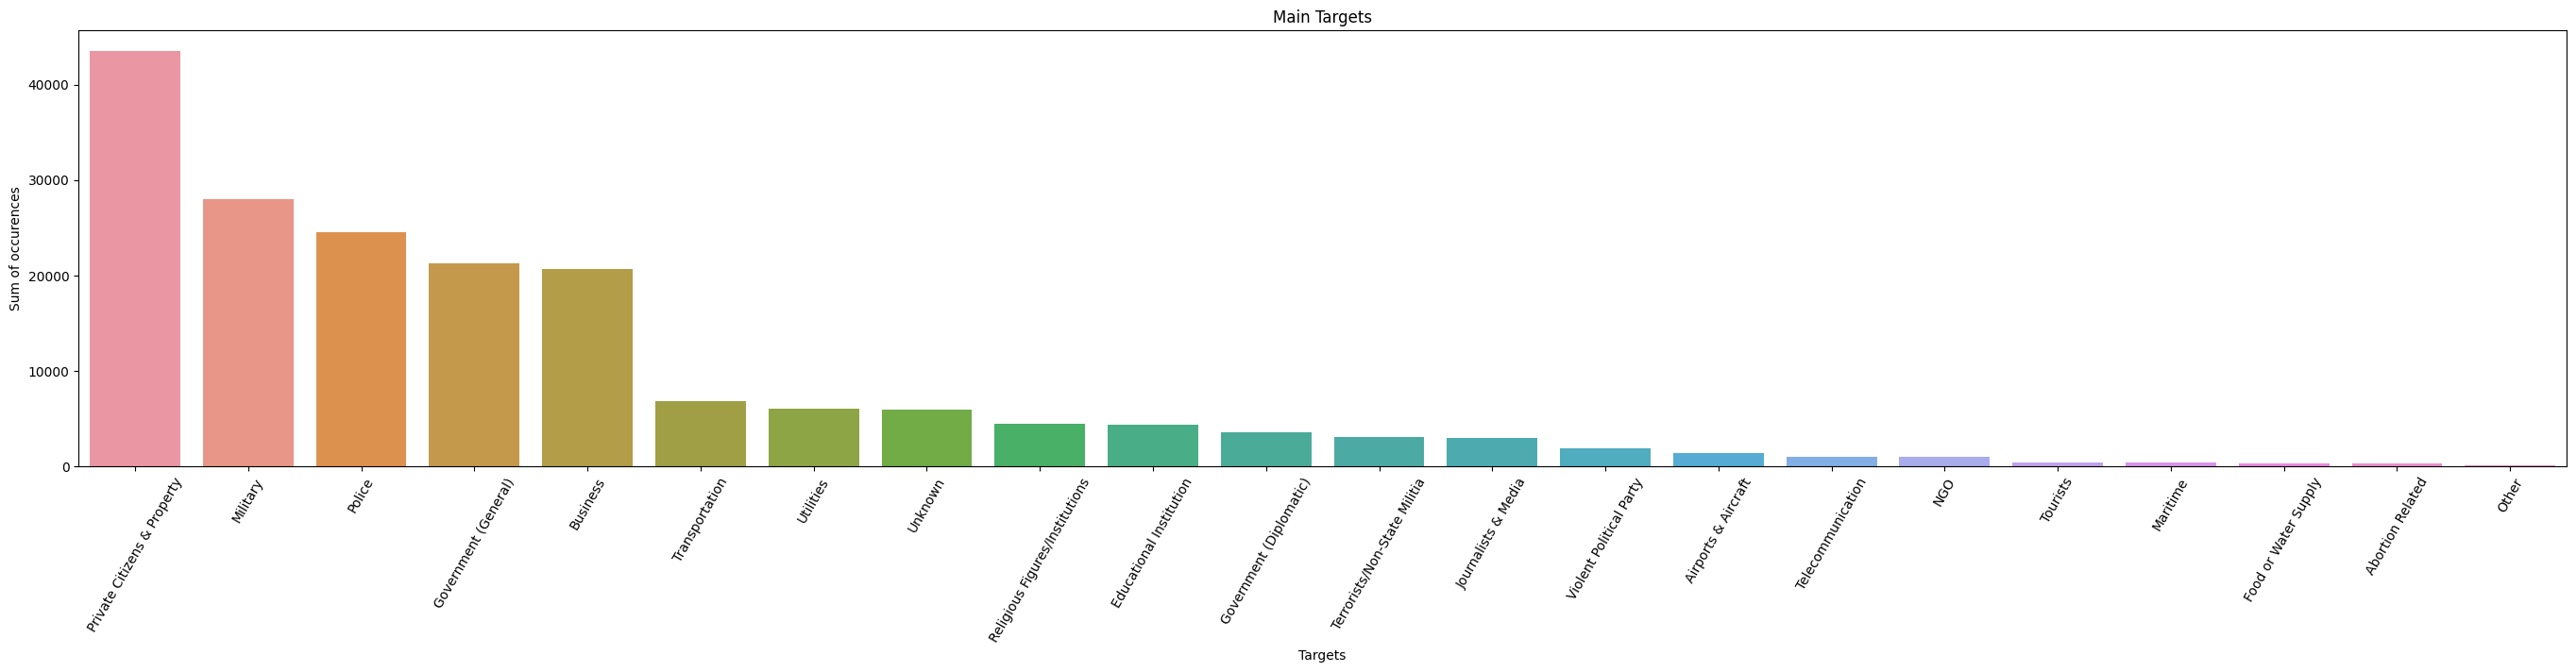

In [ ]:
plt.figure(figsize=(34,6))
sns.countplot(x='Target_type',data=df,order=df['Target_type'].value_counts().index )
plt.xlabel('Targets')
plt.ylabel('Sum of occurences')
plt.title('Main Targets')

plt.xticks(rotation = 60)# use 90 rotation
plt.show()

## 8. Hot zones of terrorism (by Country)

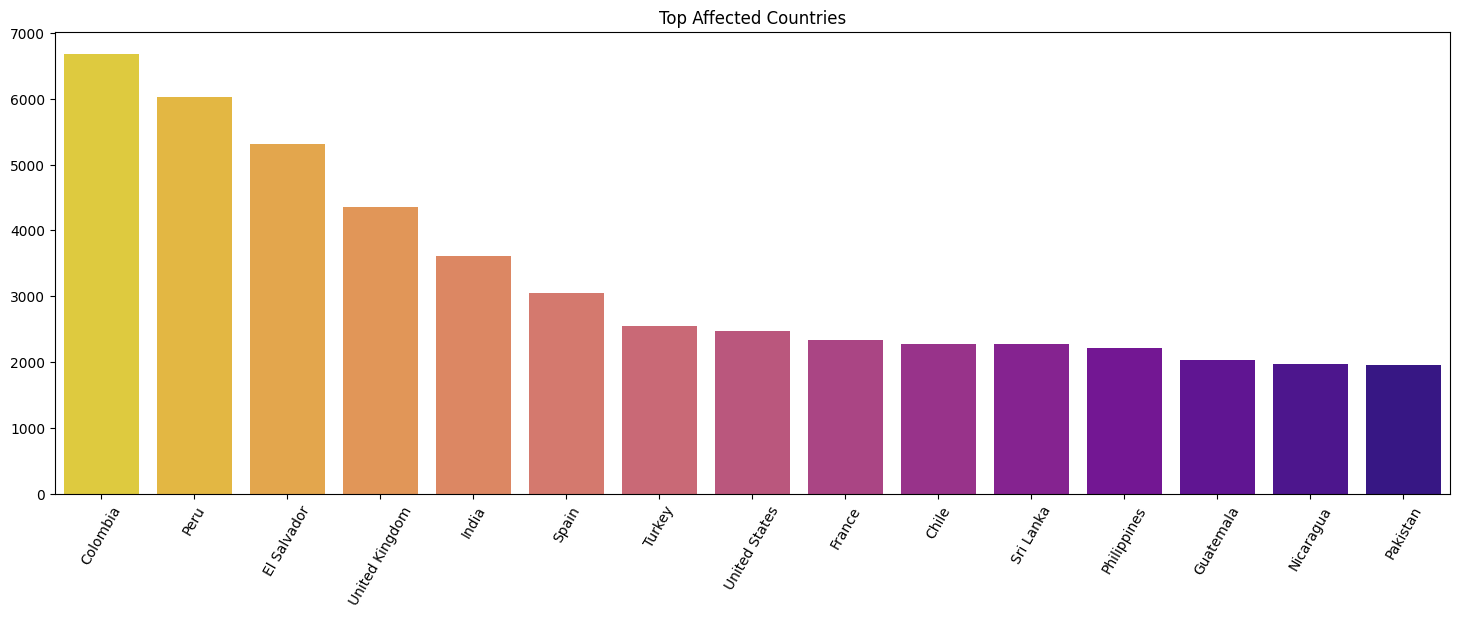

In [ ]:
plt.subplots(figsize=(18, 6))
sns.barplot(x=df['Country'].value_counts()[:15].index, y=df['Country'].value_counts()[:15].values, palette='plasma_r')
plt.title('Top Affected Countries')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability if needed
plt.show()

## 9. Hot zones of terrorism (by City)


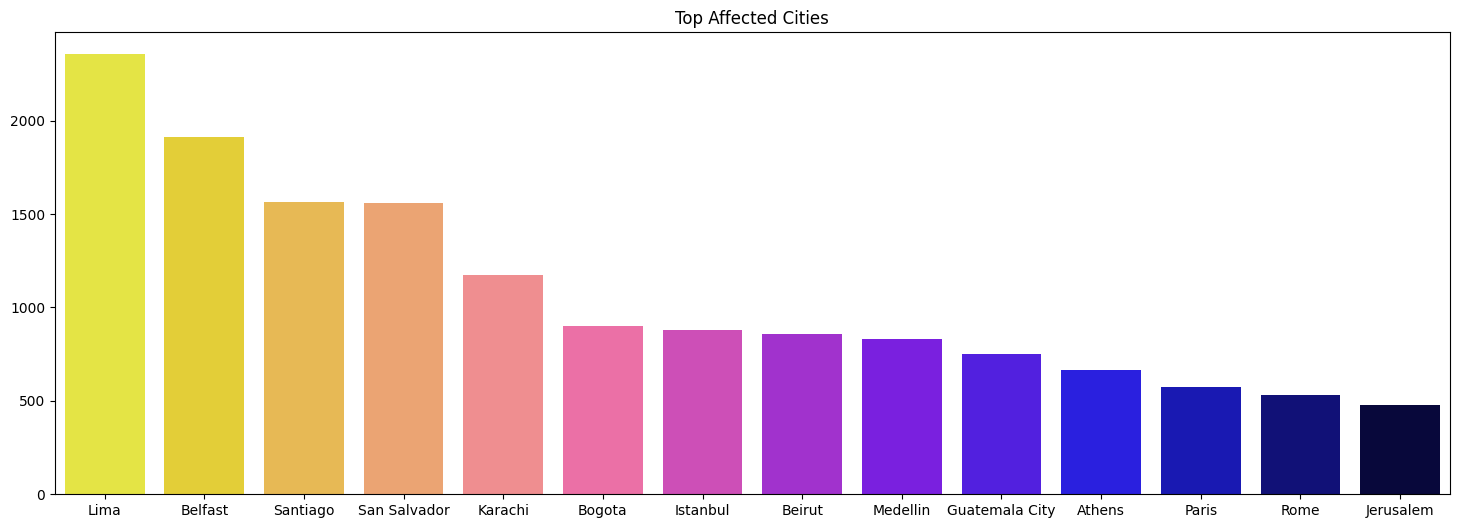

In [ ]:
plt.subplots(figsize=(18,6))
sns.barplot(x = df['city'].value_counts()[1:15].index,y = df['city'].value_counts()[1:15].values,palette='gnuplot2_r')
plt.title('Top Affected Cities')
plt.show()

## 10. What are the attacking methods used?

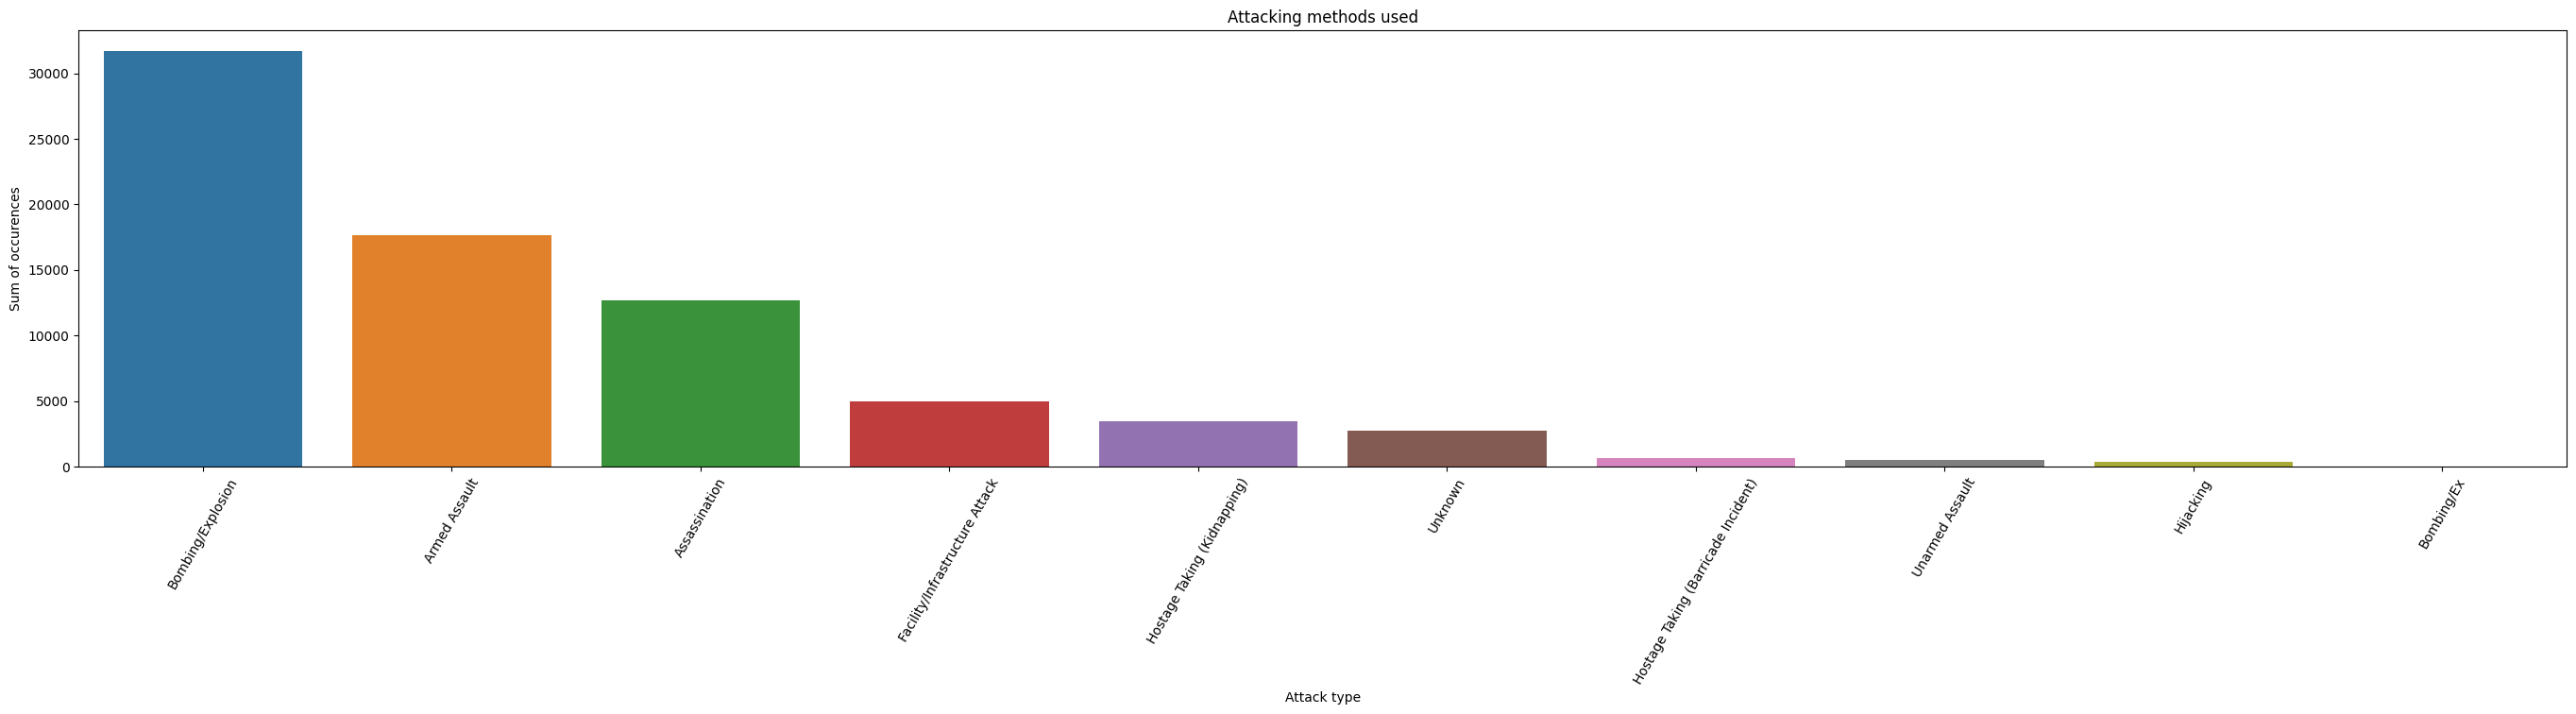

In [ ]:
plt.figure(figsize=(34,6))
sns.countplot(x='AttackType',data=df,order=df['AttackType'].value_counts().index )
plt.xlabel('Attack type')
plt.ylabel('Sum of occurences')
plt.title('Attacking methods used')

plt.xticks(rotation = 60)
plt.show()#use pie chart

## 11. Attack vs Killed

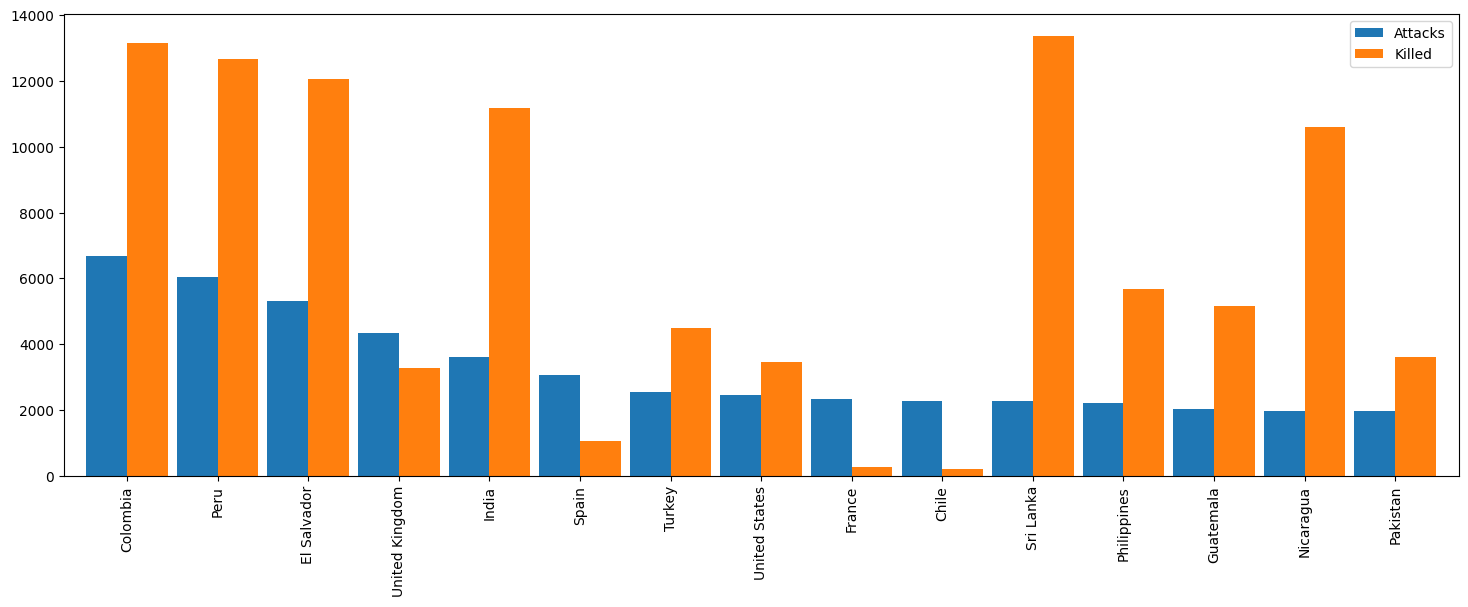

In [ ]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## 12. Most Notorious Groups

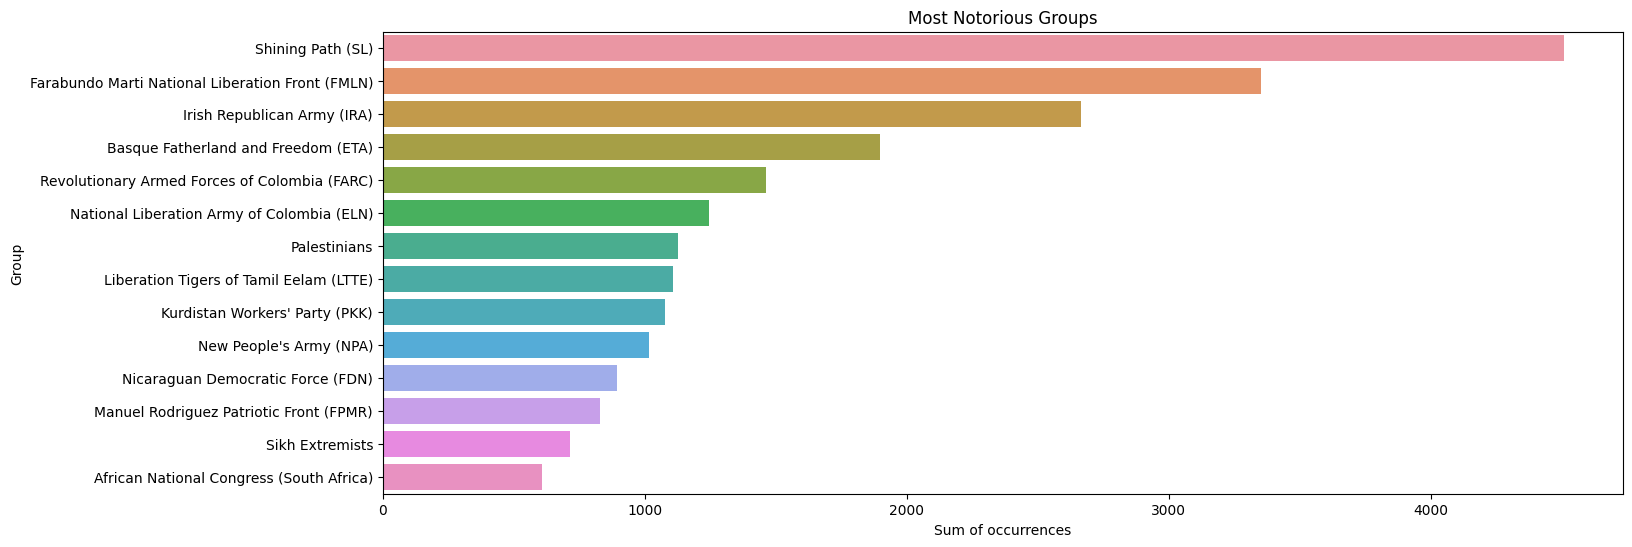

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['Group'].value_counts()[1:15].values, y=df['Group'].value_counts()[1:15].index, orient='horizontal')
plt.xlabel('Sum of occurrences')
plt.ylabel('Group')
plt.title('Most Notorious Groups')
plt.show()

## 13. Activity of Top Terrorist Groups

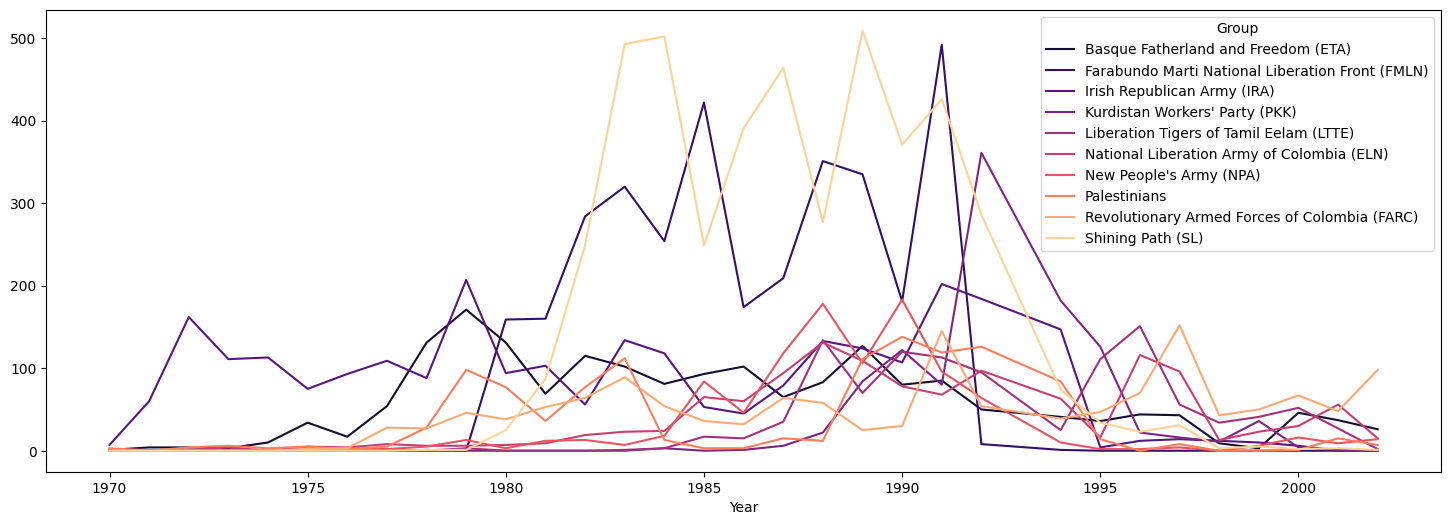

In [ ]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Conclusion

In summary, we've explored different forms of analysis and engaged in question-and-answer sessions with a dataset that piqued my interest. I'd like to highlight something valuable I've discovered. When we merely glance at a dataset, all we can discern is the column information and its contents. Therefore, Exploratory Data Analysis (EDA) proves to be an incredibly effective method to simplify our tasks. Thanks to Python libraries such as pandas, numpy, matplotlib, seaborn, and plotly, we're equipped to draw conclusions, perform calculations, and create visualizations, greatly enhancing our analytical capabilities.

Based on the preceding analysis, we can draw the following conclusions:
* Iraq ranks highest in the number of attacks.
* The Middle and East Africa region experiences the highest number of attacks.
* The predominant weapon employed by terrorists is explosives.
* Within the analysis, it is evident that in 2014, Iraq witnessed the highest level of terrorist activities.
* Private citizens and property emerge as the primary targets of terrorist activities.
* The most prevalent methods in terrorism activities involve bombing and explosions.
* The Taliban stands out as the most notorious group, having been involved in the highest number of terrorist activities.

***Robust security measures should be provided to countries such as Iraq, Pakistan, Afghanistan, and India, as well as to regions in the Middle East and cities like Baghdad, Karachi, Lima, and numerous others.***

***Precautions must be taken concerning explosive devices, as bombings and explosions are the most frequently utilized weapons by terrorists.***

***Effective security should be extended to safeguard private citizens, property, the military, police, and other entities, as they represent the primary targets of terrorism.***